In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import openpathsampling as paths
storage = paths.storage.Storage("mistis.nc", "r")

In [2]:
mistis = storage.networks.load(0)

In [3]:
# this should be true if we restored correctly
for ens in mistis.sampling_transitions[0].ensembles:
    print ens in storage.ensembles[:], repr(ens)


True <openpathsampling.ensemble.TISEnsemble object at 0x114f11a90>
True <openpathsampling.ensemble.TISEnsemble object at 0x114f25990>
True <openpathsampling.ensemble.TISEnsemble object at 0x114f3b790>
True <openpathsampling.ensemble.TISEnsemble object at 0x114f522d0>


In [4]:
mistis.hist_args['max_lambda'] = { 'bin_width' : 0.02, 'bin_range' : (-0.3, 0.5) }
mistis.hist_args['pathlength'] = { 'bin_width' : 5, 'bin_range' : (0, 150) }

In [5]:
scheme = storage.schemes[0]
scheme.move_summary(storage)

ms_outer_shooting ran 3.2967032967% of the cycles with acceptance 22/33 (0.666666666667)
repex ran 19.3806193806% of the cycles with acceptance 96/194 (0.494845360825)
msouter_shooting ran 3.7962037962% of the cycles with acceptance 25/38 (0.657894736842)
msouter_repex ran 7.99200799201% of the cycles with acceptance 34/80 (0.425)
pathreversal ran 22.4775224775% of the cycles with acceptance 116/225 (0.515555555556)
shooting ran 38.3616383616% of the cycles with acceptance 272/384 (0.708333333333)
minus ran 0.899100899101% of the cycles with acceptance 8/9 (0.888888888889)
msouter_pathreversal ran 3.6963036963% of the cycles with acceptance 37/37 (1.0)


In [6]:
for trans in mistis.transitions.values():
    trans._flux = 1.0

In [7]:
mistis.rate_matrix(storage, force=True)

,"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [0.3, inf]})","({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})"
"({x|opX(x) in [-inf, -0.3]} and {x|opY(x) in [-inf, -0.3]})",0.1509388,0.05007172,NaN
"({x|opX(x) in [0.3, inf]} and {x|opY(x) in [-inf, -0.3]})",NaN,NaN,0.09701515


In [8]:
trans = mistis.transitions.values()[0]
trans_hists = trans.histograms['max_lambda']

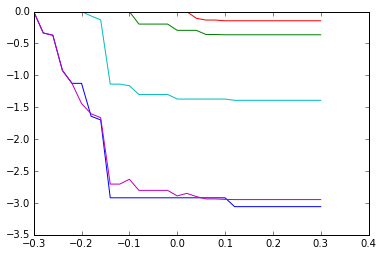

In [9]:
for hist in trans_hists:
    cross_prob = trans_hists[hist].reverse_cumulative()
    plt.plot(cross_prob.x, np.log(cross_prob))
plt.plot(trans.tcp.x, np.log(trans.tcp))